In [18]:
import pandas as pd
wine= pd.read_csv("wine_test.csv")
import seaborn as sns
import warnings
warnings.filterwarnings(action  = 'ignore')
import matplotlib.pyplot as plt
wine = wine[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class']]
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [62]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

# 정규성 검정
- 귀무가설 : 표본의 모집단이 정규분포를 이룬다
- 대립가설 : 정규분포를 이루고 있지 않다

# alcohol 변수
- class에 따라 나눈 alcohol 값들의 분포는 모두 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다

ShapiroResult(statistic=0.9781621694564819, pvalue=0.3895796835422516)
ShapiroResult(statistic=0.9720515012741089, pvalue=0.1139594316482544)
ShapiroResult(statistic=0.9814674258232117, pvalue=0.6408318877220154)


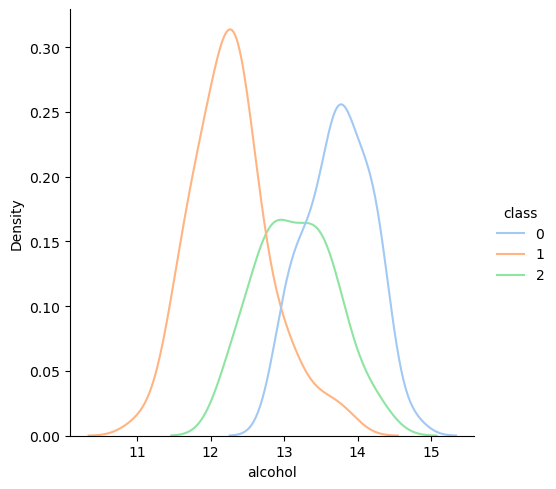

In [103]:
# alcohol 변수
import numpy as np
from scipy import stats
wine_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']


sns.displot(data = wine, x=wine_features[0],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[0]} Distribution')
print(stats.shapiro(wine[wine['class']==0]['alcohol'].dropna()))
print(stats.shapiro(wine[wine['class']==1]['alcohol'].dropna()))
print(stats.shapiro(wine[wine['class']==2]['alcohol'].dropna()))

# malic_acid
- class에 따라 나눈 malic_acid 값들의 분포는 class가 0과 1일때는 pvalue가 0.05보다 작아 귀무가설을 기긱하여 정규분포를 이루지 않고, class가 2일때는 귀무가설을 채택하여 정규분포를 이룬다

ShapiroResult(statistic=0.646978497505188, pvalue=1.2033937735189681e-10)
ShapiroResult(statistic=0.8338780999183655, pvalue=1.8398624490600923e-07)
ShapiroResult(statistic=0.9837198853492737, pvalue=0.7377341389656067)


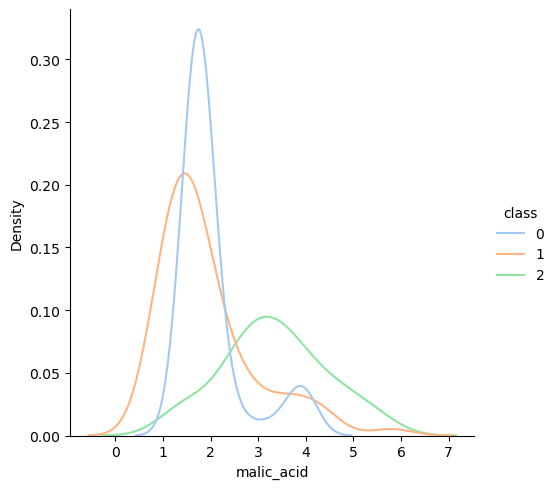

In [104]:
# malic_acid
sns.displot(data = wine, x=wine_features[1],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[1]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[1]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[1]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[1]].dropna()))

# ash
- class에 따라 나눈 ash 값들의 분포는 모두 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다

ShapiroResult(statistic=0.9701553583145142, pvalue=0.155553936958313)
ShapiroResult(statistic=0.9860392808914185, pvalue=0.6197851300239563)
ShapiroResult(statistic=0.9608452320098877, pvalue=0.10922335833311081)


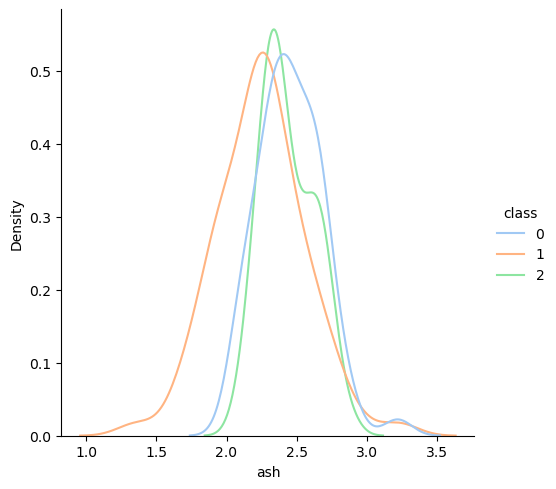

In [105]:
# ash
sns.displot(data = wine, x=wine_features[2],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[2]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[2]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[2]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[2]].dropna()))

# alcalinity_of_ash
- class에 따라 나눈 alcalinity_of_ash 값들의 분포는 모두 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다

ShapiroResult(statistic=0.9731464982032776, pvalue=0.21608473360538483)
ShapiroResult(statistic=0.9687774181365967, pvalue=0.07397200167179108)
ShapiroResult(statistic=0.959761381149292, pvalue=0.09874077886343002)


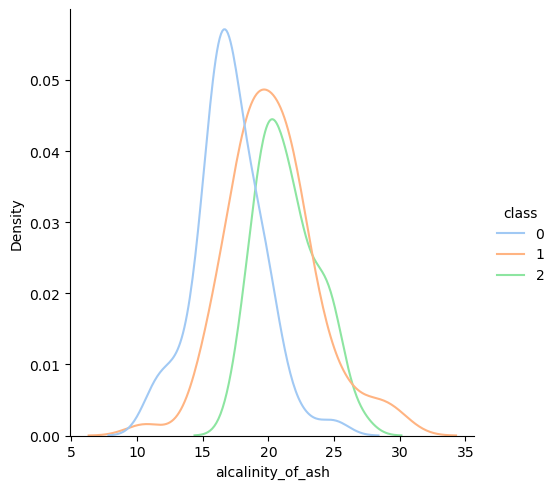

In [106]:
# alcalinity_of_ash
sns.displot(data = wine, x=wine_features[3],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[3]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[3]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[3]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[3]].dropna()))

# magnesium
- class에 따라 나눈 magnesium 값들의 분포에서 class가 0일때는  pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 1,2일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9648589491844177, pvalue=0.08617619425058365)
ShapiroResult(statistic=0.7790312170982361, pvalue=5.7919038454201655e-09)
ShapiroResult(statistic=0.9496299028396606, pvalue=0.03865352272987366)


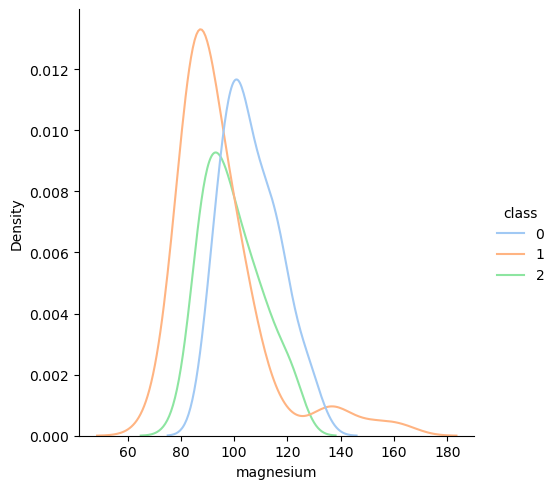

In [107]:
# magnesium
sns.displot(data = wine, x=wine_features[4],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[4]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[4]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[4]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[4]].dropna()))

# total_phenols
- class에 따라 나눈 total_phenols 값들의 분포에서 class가 1일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 0,2일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9517430067062378, pvalue=0.020296236500144005)
ShapiroResult(statistic=0.9800382852554321, pvalue=0.3180047571659088)
ShapiroResult(statistic=0.9396748542785645, pvalue=0.015768591314554214)


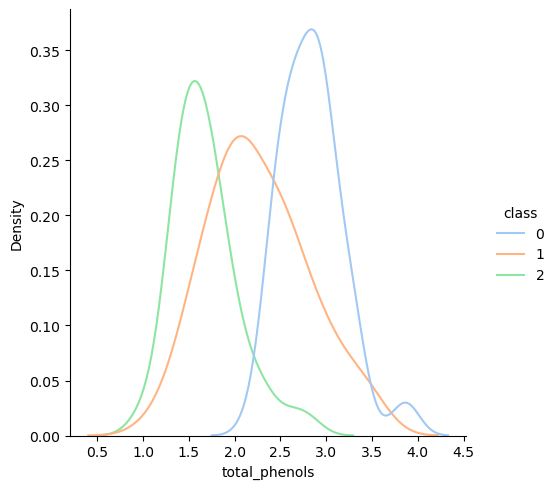

In [108]:
# total_phenols
sns.displot(data = wine, x=wine_features[5],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[5]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[5]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[5]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[5]].dropna()))

# flavanoids
- class에 따라 나눈 total_phenols 값들의 분포에서 class가 0일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 1,2일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9841882586479187, pvalue=0.6387166380882263)
ShapiroResult(statistic=0.9371888637542725, pvalue=0.0014982314314693213)
ShapiroResult(statistic=0.8922219276428223, pvalue=0.0003560669138096273)


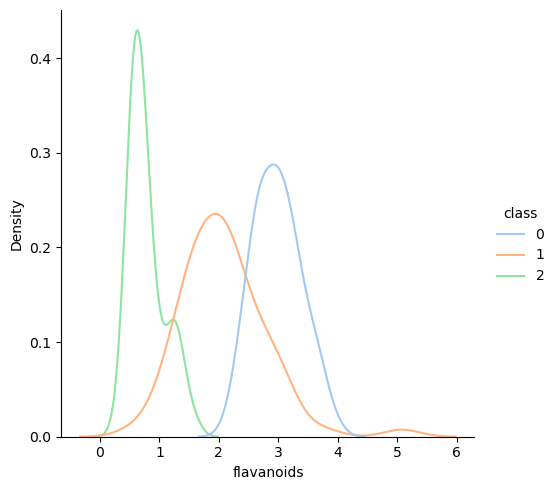

In [109]:
# flavanoids
sns.displot(data = wine, x=wine_features[6],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[6]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[6]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[6]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[6]].dropna()))

# nonflavanoid_phenols
- class에 따라 나눈 nonflavanoid_phenols값들의 분포에서 class가 1일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 0,2일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다


ShapiroResult(statistic=0.9553877115249634, pvalue=0.03015216439962387)
ShapiroResult(statistic=0.9771526455879211, pvalue=0.2624799907207489)
ShapiroResult(statistic=0.9438294768333435, pvalue=0.02283581718802452)


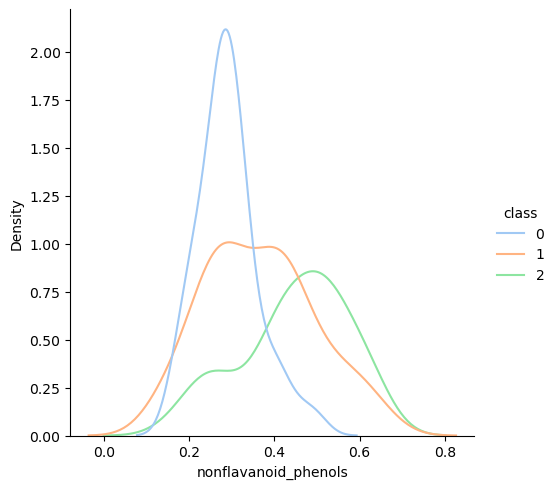

In [110]:
# nonflavanoid_phenols
sns.displot(data = wine, x=wine_features[7],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[7]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[7]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[7]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[7]].dropna()))

# proanthocyanins
- 모든 class에 대하여  pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9557863473892212, pvalue=0.03149707615375519)
ShapiroResult(statistic=0.9515681862831116, pvalue=0.008146279491484165)
ShapiroResult(statistic=0.8872020244598389, pvalue=0.0002491046325303614)


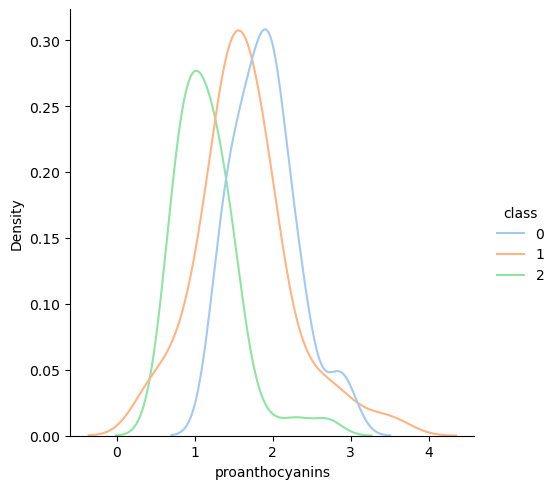

In [111]:
# proanthocyanins
sns.displot(data = wine, x=wine_features[8],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[8]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[8]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[8]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[8]].dropna()))

# color_intensity
- class에 따라 나눈 color_intensity 값들의 분포에서 class가 0일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 1,2일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9681947827339172, pvalue=0.12509089708328247)
ShapiroResult(statistic=0.9317483305931091, pvalue=0.0008194572874344885)
ShapiroResult(statistic=0.9584943056106567, pvalue=0.08775369822978973)


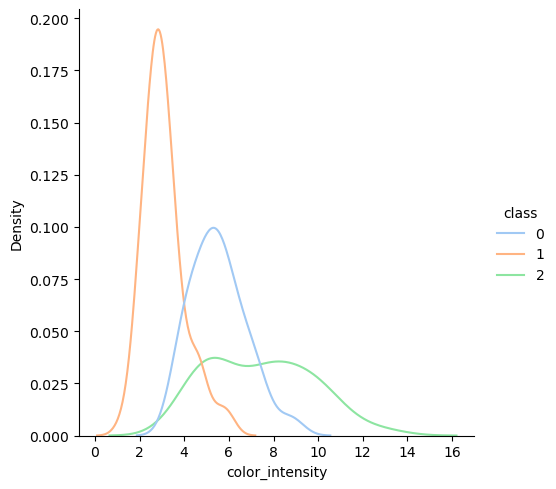

In [112]:
# color_intensity
sns.displot(data = wine, x=wine_features[9],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[9]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[9]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[9]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[9]].dropna()))

# hue
- class에 따라 나눈 hue값들의 분포에서 class가 0,1일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 2일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9698768854141235, pvalue=0.15082599222660065)
ShapiroResult(statistic=0.9772727489471436, pvalue=0.22492405772209167)
ShapiroResult(statistic=0.946163535118103, pvalue=0.028187604621052742)


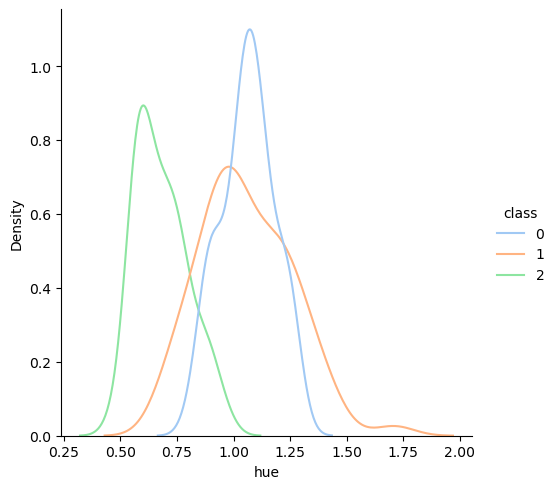

In [113]:
# hue
sns.displot(data = wine, x=wine_features[10],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[10]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[10]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[10]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[10]].dropna()))

# od280/od315_of_diluted_wines
- class에 따라 나눈 od280/od315_of_diluted_wines 값들의 분포에서 class가 0,1,2 일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다

ShapiroResult(statistic=0.9639029502868652, pvalue=0.0774432048201561)
ShapiroResult(statistic=0.9701817631721497, pvalue=0.0890427827835083)
ShapiroResult(statistic=0.9579098224639893, pvalue=0.08310769498348236)


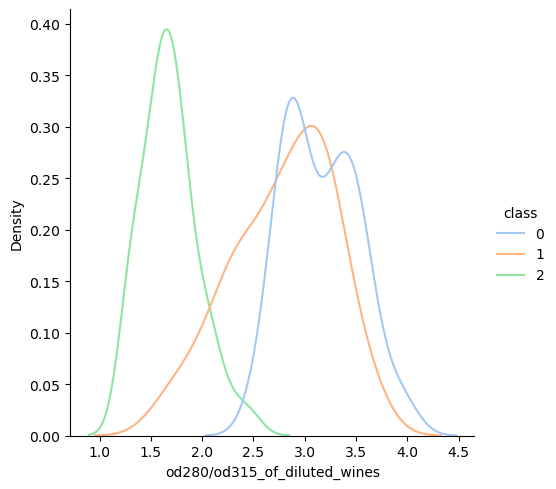

In [114]:
# od280/od315_of_diluted_wines
sns.displot(data = wine, x=wine_features[11],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[11]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[11]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[11]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[11]].dropna()))

# proline 
- class에 따라 나눈 proline값들의 분포에서 class가 0,2일때는 pvalue가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 이룬다
- class가 1일때는 pvalue가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 이루지 않는다

ShapiroResult(statistic=0.9818523526191711, pvalue=0.5232545733451843)
ShapiroResult(statistic=0.9386794567108154, pvalue=0.0017737220041453838)
ShapiroResult(statistic=0.9769411087036133, pvalue=0.45849665999412537)


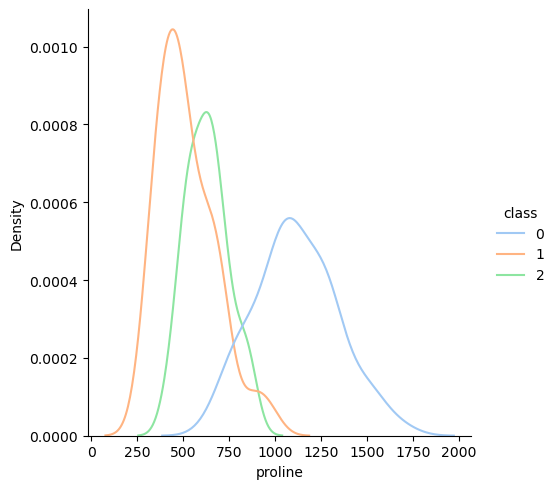

In [115]:
# proline
sns.displot(data = wine, x=wine_features[12],
                 hue='class',
                 palette = 'pastel' ,
            kind = 'kde'#색상조절하기
                  ) 
ax.set_title(f'{wine_features[12]} Distribution')
print(stats.shapiro(wine[wine['class']==0][wine_features[12]].dropna()))
print(stats.shapiro(wine[wine['class']==1][wine_features[12]].dropna()))
print(stats.shapiro(wine[wine['class']==2][wine_features[12]].dropna()))